In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_data = pd.read_csv("files/user_data.csv")
pop_data = pd.read_csv("files/pop_data.csv")

In [4]:
user_data.head(15)

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21
5,"Austin, TX",college,25
6,"Oakland, CA",graduate degree,29
7,"Pittsburgh, PA",college,29
8,"Pittsburgh, PA",college,27
9,"Pittsburgh, PA",graduate degree,28


In [5]:
pop_data.head(15)

,city,population_proper
0,"Prairie Ridge, WA",NaN
1,"Edison, WA",NaN
2,"Packwood, WA",NaN
3,"Wautauga Beach, WA",NaN
4,"Harper, WA",NaN
5,"Telma, WA",NaN
6,"Kahlotus, WA",189.0
7,"Mondovi, WA",NaN
8,"Washtucna, WA",195.0
9,"Pleasant Hill, WA",NaN


In [6]:
new_df = pd.merge(user_data, pop_data)
new_df.head(15)

,city,education,age,population_proper
0,"Brooklyn, NY",college,31,2629150.0
1,"Brooklyn, NY",graduate degree,31,2629150.0
2,"Brooklyn, NY",graduate degree,32,2629150.0
3,"Brooklyn, NY",college,37,2629150.0
4,"Brooklyn, NY",college,21,2629150.0
5,"Austin, TX",college,25,947890.0
6,"Austin, TX",graduate degree,22,947890.0
7,"Oakland, CA",graduate degree,29,420005.0
8,"Pittsburgh, PA",college,29,303625.0
9,"Pittsburgh, PA",college,27,303625.0


In [7]:
new_df.loc[new_df.population_proper < 100_000, "location"] = "rural"

In [8]:
new_df.loc[new_df.population_proper >= 100_000, "location"] = "urban"

In [9]:
new_df.head(15)

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban
5,"Austin, TX",college,25,947890.0,urban
6,"Austin, TX",graduate degree,22,947890.0,urban
7,"Oakland, CA",graduate degree,29,420005.0,urban
8,"Pittsburgh, PA",college,29,303625.0,urban
9,"Pittsburgh, PA",college,27,303625.0,urban


In [10]:
age = new_df["age"]

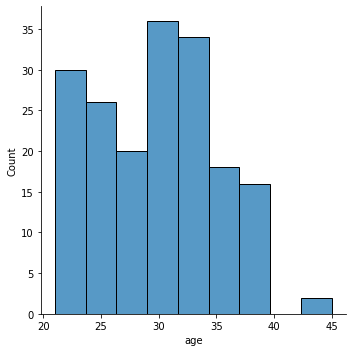

In [11]:
# visualize distribution of all age
sns.displot(age)

In [12]:
# calculate mean age of users based on their location
location_mean_age = new_df.groupby("location").age.mean()
print(location_mean_age)

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64


<AxesSubplot:xlabel='location', ylabel='age'>

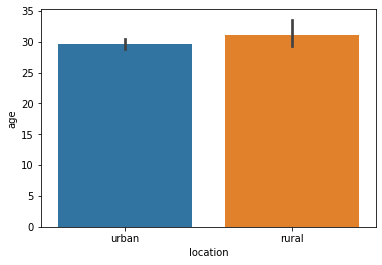

In [13]:
sns.barplot(data=new_df, x="location", y="age")

<AxesSubplot:xlabel='location', ylabel='age'>

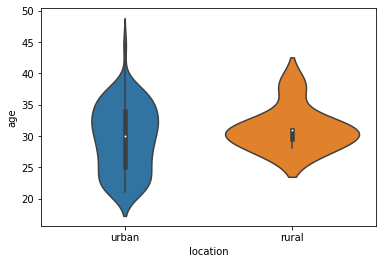

In [14]:
sns.violinplot(x="location", y="age", data=new_df)